## Задача 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

url = 'https://raw.githubusercontent.com/N1ki0-0/dataPy/refs/heads/master/data/insurance.csv'
data = pd.read_csv(url)

## Задача 2

In [16]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Задача 3

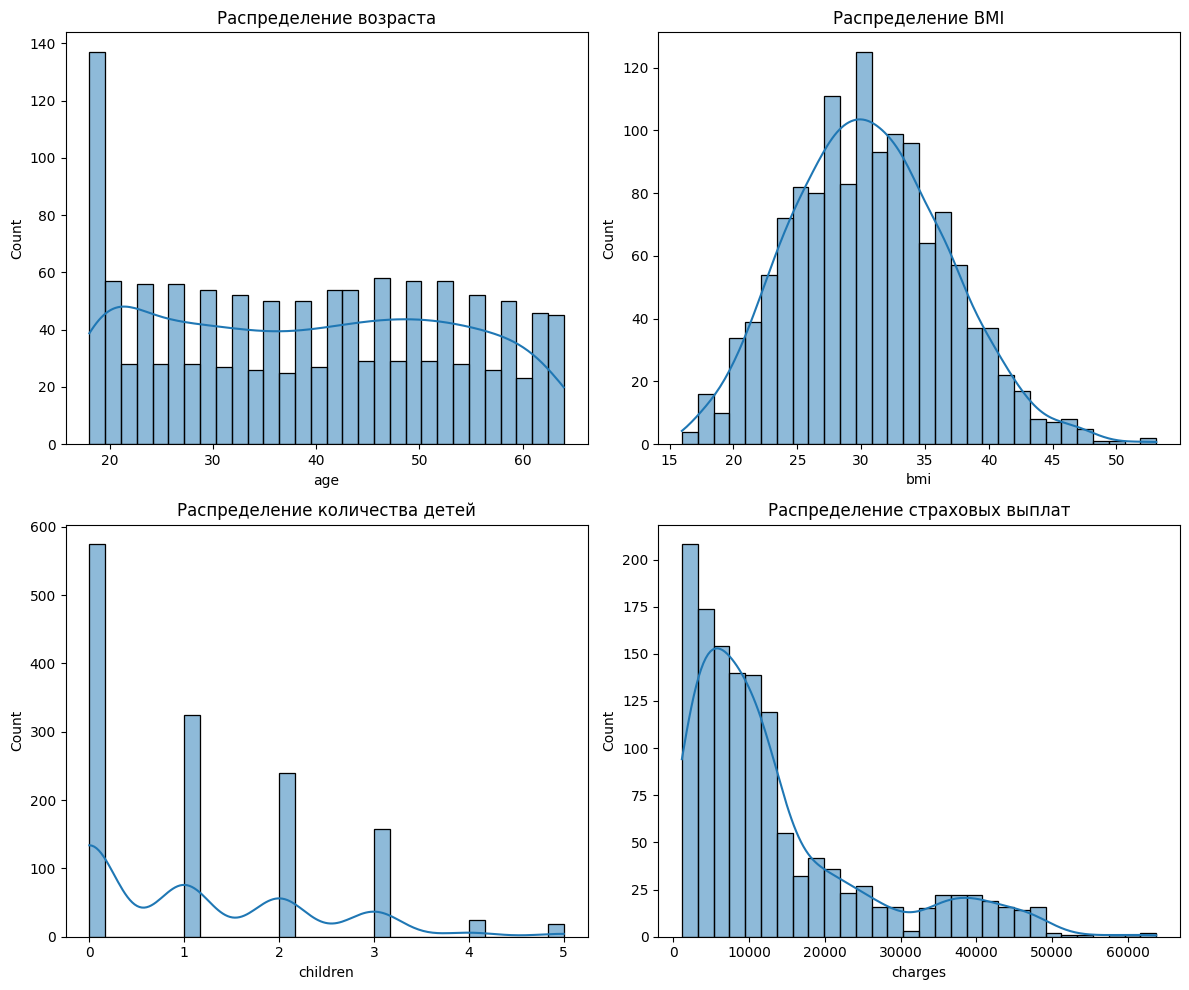

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Распределение возраста')

plt.subplot(2, 2, 2)
sns.histplot(data['bmi'], kde=True, bins=30)
plt.title('Распределение BMI')

plt.subplot(2, 2, 3)
sns.histplot(data['children'], kde=True, bins=30)
plt.title('Распределение количества детей')

plt.subplot(2, 2, 4)
sns.histplot(data['charges'], kde=True, bins=30)
plt.title('Распределение страховых выплат')
plt.tight_layout()
plt.show()


## Задача 4

BMI - Среднее: 30.66339686098655, Медиана: 30.4, Мода: 32.3,Стандартное отклонение: 6.098186911679017, Дисперсия: 37.187883609773266
Расходы - Среднее: 13270.422265141257, Медиана: 9382.033, Мода:1639.5631, Стандартное отклонение: 12110.011236693994, Дисперсия: 146652372.1528548


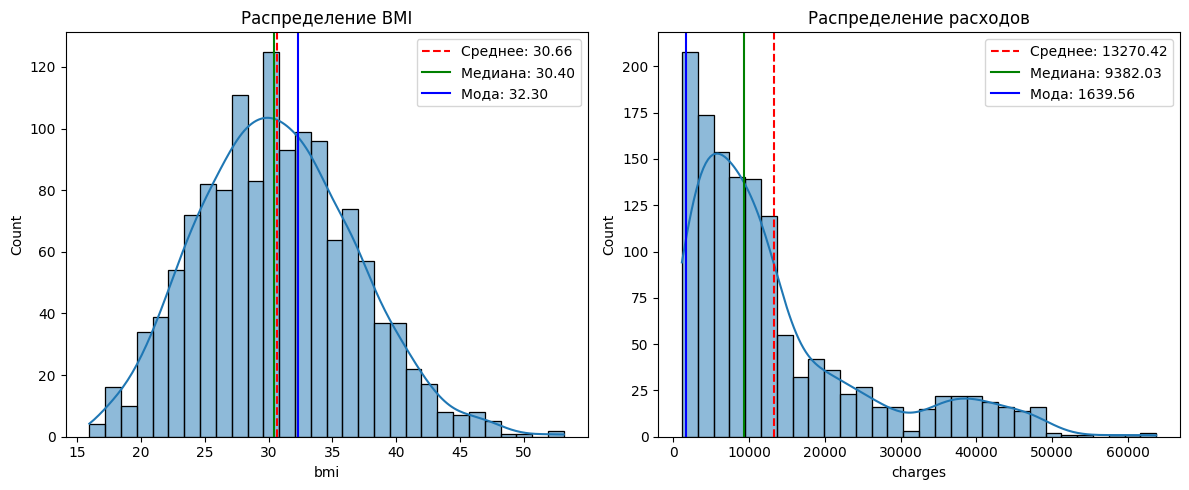

In [18]:
bmi_mean = data['bmi'].mean()
bmi_median = data['bmi'].median()
bmi_mode = data['bmi'].mode()[0]
bmi_std = data['bmi'].std()
bmi_var = data['bmi'].var()

charges_mean = data['charges'].mean()
charges_median = data['charges'].median()
charges_mode = data['charges'].mode()[0]
charges_std = data['charges'].std()
charges_var = data['charges'].var()

print(f"BMI - Среднее: {bmi_mean}, Медиана: {bmi_median}, Мода: {bmi_mode},Стандартное отклонение: {bmi_std}, Дисперсия: {bmi_var}")
print(f"Расходы - Среднее: {charges_mean}, Медиана: {charges_median}, Мода:{charges_mode}, Стандартное отклонение: {charges_std}, Дисперсия: {charges_var}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['bmi'], kde=True, bins=30)
plt.axvline(bmi_mean, color='r', linestyle='--', label=f'Среднее: {bmi_mean:.2f}')
plt.axvline(bmi_median, color='g', linestyle='-', label=f'Медиана: {bmi_median:.2f}')
plt.axvline(bmi_mode, color='b', linestyle='-', label=f'Мода: {bmi_mode:.2f}')
plt.title('Распределение BMI')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data['charges'], kde=True, bins=30)
plt.axvline(charges_mean, color='r', linestyle='--', label=f'Среднее: {charges_mean:.2f}')
plt.axvline(charges_median, color='g', linestyle='-', label=f'Медиана: {charges_median:.2f}')
plt.axvline(charges_mode, color='b', linestyle='-', label=f'Мода: {charges_mode:.2f}')
plt.title('Распределение расходов')
plt.legend()
plt.tight_layout()
plt.show()


## Задача 5

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


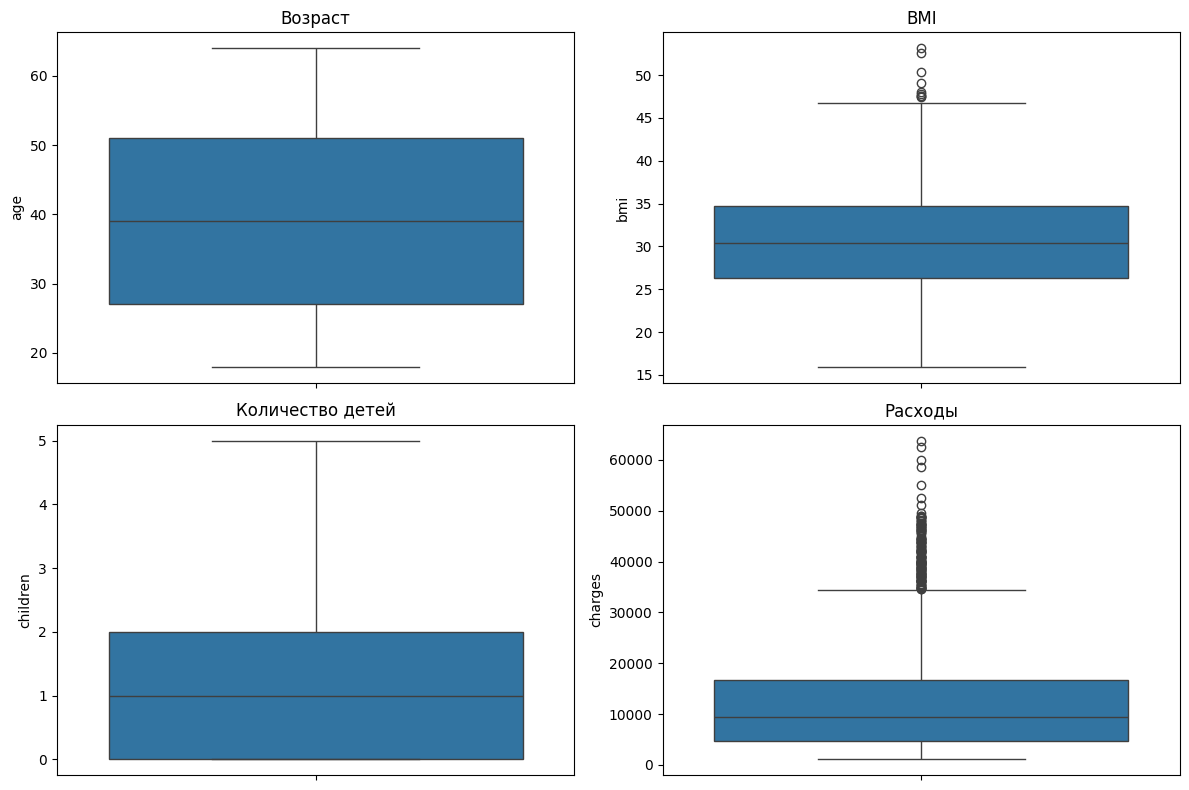

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=data['age'])
plt.title('Возраст')

plt.subplot(2, 2, 2)
sns.boxplot(y=data['bmi'])
plt.title('BMI')

plt.subplot(2, 2, 3)
sns.boxplot(y=data['children'])
plt.title('Количество детей')

plt.subplot(2, 2, 4)
sns.boxplot(y=data['charges'])
plt.title('Расходы')
plt.tight_layout()
plt.show()

## Задача 6

Размер выборки n=30: Среднее=13501.47, Стандартное отклонение=2323.49
Размер выборки n=50: Среднее=13207.42, Стандартное отклонение=1720.44
Размер выборки n=100: Среднее=13288.02, Стандартное отклонение=1301.82
Размер выборки n=200: Среднее=13323.14, Стандартное отклонение=804.61


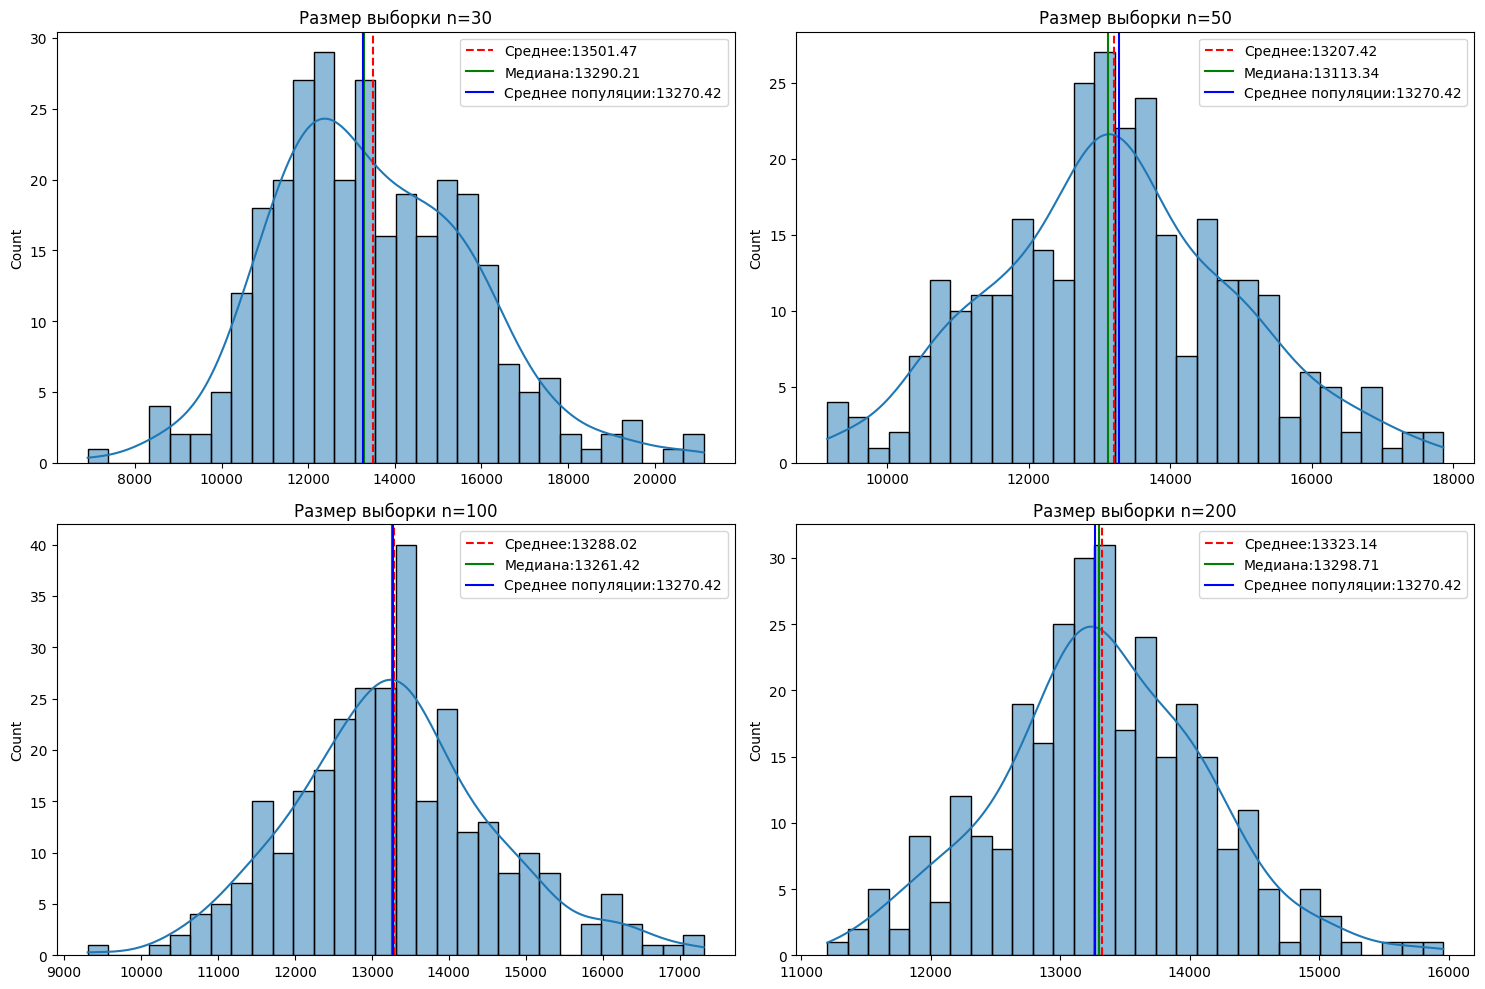

In [20]:
charges = data['charges']
def check_central_limit_theorem(data, sample_sizes, num_samples=300):
 plt.figure(figsize=(15, 10))
 for i, n in enumerate(sample_sizes):
  sample_means = [np.mean(np.random.choice(data, n)) for _ in range(num_samples)]
  plt.subplot(2, 2, i+1)
  sns.histplot(sample_means, kde=True, bins=30)
  plt.axvline(np.mean(sample_means), color='r', linestyle='--', label=f'Среднее:{np.mean(sample_means):.2f}')
  plt.axvline(np.median(sample_means), color='g', linestyle='-', label=f'Медиана:{np.median(sample_means):.2f}')
  plt.axvline(np.mean(data), color='b', linestyle='-', label=f'Среднее популяции:{np.mean(data):.2f}')
  plt.title(f'Размер выборки n={n}')
  plt.legend()
  print(f'Размер выборки n={n}: Среднее={np.mean(sample_means):.2f}, Стандартное отклонение={np.std(sample_means):.2f}')
 plt.tight_layout()
 plt.show()

sample_sizes = [30, 50, 100, 200]
check_central_limit_theorem(charges, sample_sizes)

## Задача 7

95% доверительный интервал для расходов: (12620.95,13919.89)
99% доверительный интервал для расходов: (12416.43,14124.41)
95% доверительный интервал для BMI: (30.34,30.99)
99% доверительный интервал для BMI: (30.23,31.09)


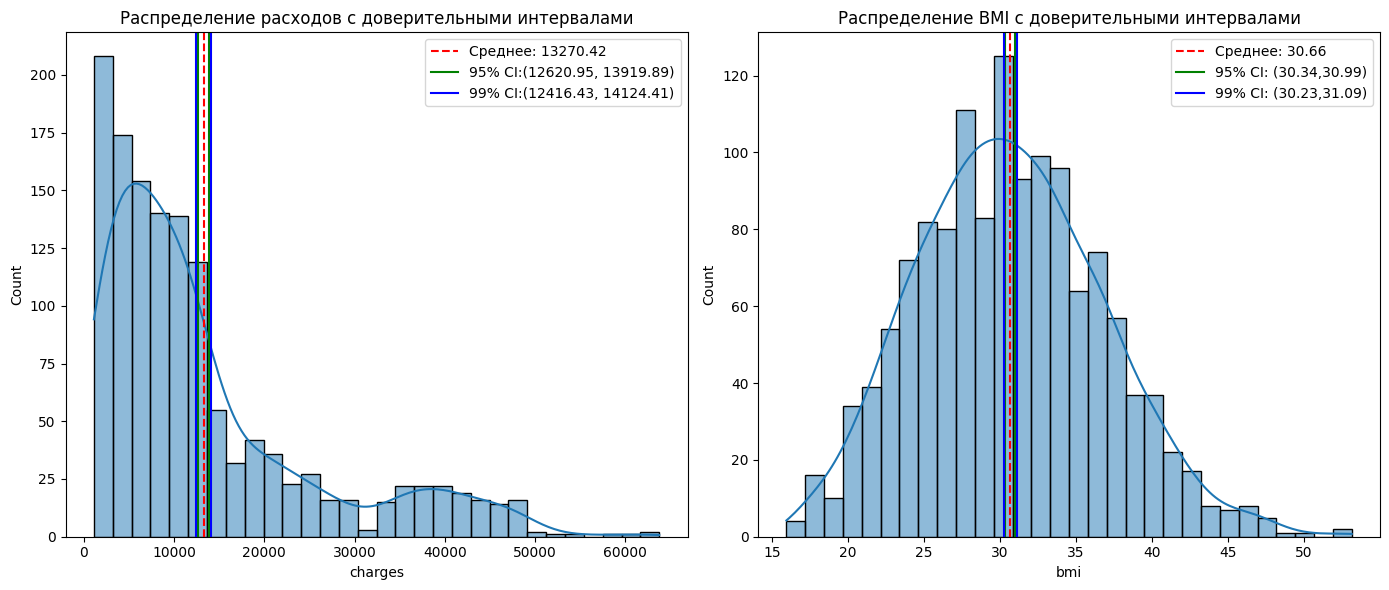

In [21]:
charges = data['charges']
bmi = data['bmi']
def confidence_interval(data, confidence=0.95):
 n = len(data)
 mean = np.mean(data)
 std_err = np.std(data, ddof=1) / np.sqrt(n)
 h = std_err * stats.t.ppf((1 + confidence) / 2., n-1)
 return mean, mean - h, mean + h
charges_mean, charges_ci_lower_95, charges_ci_upper_95 = confidence_interval(charges,0.95)
charges_mean, charges_ci_lower_99, charges_ci_upper_99 = confidence_interval(charges,0.99)
bmi_mean, bmi_ci_lower_95, bmi_ci_upper_95 = confidence_interval(bmi, 0.95)
bmi_mean, bmi_ci_lower_99, bmi_ci_upper_99 = confidence_interval(bmi, 0.99)

print(f"95% доверительный интервал для расходов: ({charges_ci_lower_95:.2f},{charges_ci_upper_95:.2f})")
print(f"99% доверительный интервал для расходов: ({charges_ci_lower_99:.2f},{charges_ci_upper_99:.2f})")
print(f"95% доверительный интервал для BMI: ({bmi_ci_lower_95:.2f},{bmi_ci_upper_95:.2f})")
print(f"99% доверительный интервал для BMI: ({bmi_ci_lower_99:.2f},{bmi_ci_upper_99:.2f})")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(charges, kde=True, bins=30)
plt.axvline(charges_mean, color='r', linestyle='--', label=f'Среднее: {charges_mean:.2f}')
plt.axvline(charges_ci_lower_95, color='g', linestyle='-', label=f'95% CI:({charges_ci_lower_95:.2f}, {charges_ci_upper_95:.2f})')
plt.axvline(charges_ci_upper_95, color='g', linestyle='-')
plt.axvline(charges_ci_lower_99, color='b', linestyle='-', label=f'99% CI:({charges_ci_lower_99:.2f}, {charges_ci_upper_99:.2f})')
plt.axvline(charges_ci_upper_99, color='b', linestyle='-')
plt.title('Распределение расходов с доверительными интервалами')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(bmi, kde=True, bins=30)
plt.axvline(bmi_mean, color='r', linestyle='--', label=f'Среднее: {bmi_mean:.2f}')
plt.axvline(bmi_ci_lower_95, color='g', linestyle='-', label=f'95% CI: ({bmi_ci_lower_95:.2f},{bmi_ci_upper_95:.2f})')
plt.axvline(bmi_ci_upper_95, color='g', linestyle='-')
plt.axvline(bmi_ci_lower_99, color='b', linestyle='-', label=f'99% CI: ({bmi_ci_lower_99:.2f},{bmi_ci_upper_99:.2f})')
plt.axvline(bmi_ci_upper_99, color='b', linestyle='-')
plt.title('Распределение BMI с доверительными интервалами')
plt.legend()
plt.tight_layout()
plt.show()


## Задача 8

KS-тест для BMI: статистика=0.0261, p-значение=0.3145
KS-тест для Charges: статистика=0.1885, pзначение=0.0000


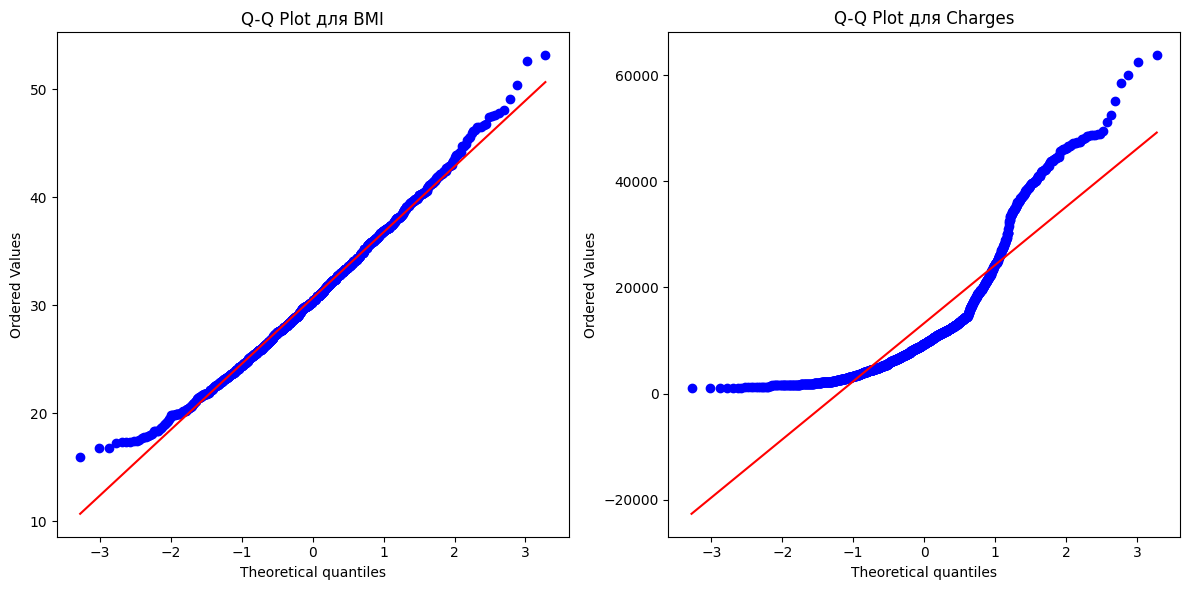

In [22]:
bmi = data['bmi']
charges = data['charges']

ks_stat_bmi, p_value_bmi = stats.kstest(bmi, 'norm', args=(np.mean(bmi), np.std(bmi)))

ks_stat_charges, p_value_charges = stats.kstest(charges, 'norm', args=(np.mean(charges),
np.std(charges)))
print(f"KS-тест для BMI: статистика={ks_stat_bmi:.4f}, p-значение={p_value_bmi:.4f}")
print(f"KS-тест для Charges: статистика={ks_stat_charges:.4f}, pзначение={p_value_charges:.4f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(bmi, dist="norm", plot=plt)
plt.title('Q-Q Plot для BMI')

plt.subplot(1, 2, 2)
stats.probplot(charges, dist="norm", plot=plt)
plt.title('Q-Q Plot для Charges')
plt.tight_layout()
plt.show()

## Задача 9

In [ ]:
url = 'https://raw.githubusercontent.com/N1ki0-0/dataPy/refs/heads/master/data//ECDCCases.csv'
data = pd.read_csv(url)

## Задача 10

In [24]:
print("Имена столбцов:")
print(data.columns)
missing_percent = data.isnull().sum() * 100 / len(data)
print("Процент пропущенных значений по столбцам:")
print(missing_percent)
columns_to_drop = missing_percent.nlargest(2).index
data = data.drop(columns=columns_to_drop)
print(f"Удалены столбцы: {columns_to_drop}")
for column in data.columns:
 if data[column].dtype == 'object':
  data[column] = data[column].fillna('other')
 else:
  data[column] = data[column].fillna(data[column].median())
missing_percent_after = data.isnull().sum() * 100 / len(data)
print("Процент пропущенных значений после обработки:")
print(missing_percent_after)


Имена столбцов:
Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')
Процент пропущенных значений по столбцам:
dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                  

## Задача 11

In [25]:
description = data.describe()
print("Описательная статистика:")
print(description)

def detect_outliers(df):
 outliers = {}
 for column in df.select_dtypes(include=['float64', 'int64']).columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].count()
 return outliers
outliers = detect_outliers(data)
print("Количество выбросов по признакам:")
print(outliers)
high_deaths = data[data['deaths'] > 3000]
high_deaths_count = high_deaths.groupby('countriesAndTerritories')['deaths'].count()
print("Количество дней с более чем 3000 смертей по странам:")
print(high_deaths_count)


Описательная статистика:
                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  
Количество выбросов по признакам:
{'day': 0, 'month': 0,

## Задача 12



In [26]:
print("Количество строк до удаления дубликатов:", len(data))
data = data.drop_duplicates()
print("Количество строк после удаления дубликатов:", len(data))

Количество строк до удаления дубликатов: 61904
Количество строк после удаления дубликатов: 61900


## Задача 13

In [ ]:
url = 'https://raw.githubusercontent.com/N1ki0-0/dataPy/refs/heads/master/data/bmi.csv'
data = pd.read_csv(url)
bmi_northwest = data[data['region'] == 'northwest']['bmi']
bmi_southwest = data[data['region'] == 'southwest']['bmi']
shapiro_nw = stats.shapiro(bmi_northwest)
shapiro_sw = stats.shapiro(bmi_southwest)
print("Шапиро-Уилк тест для northwest:", shapiro_nw)
print("Шапиро-Уилк тест для southwest:", shapiro_sw)
bartlett_test = stats.bartlett(bmi_northwest, bmi_southwest)
print("Критерий Бартлетта:", bartlett_test)
t_test = stats.ttest_ind(bmi_northwest, bmi_southwest)
print("t-критерий Стьюдента:", t_test)


Шапиро-Уилк тест для northwest: ShapiroResult(statistic=0.995464981663833, pvalue=0.4655897798883668)
Шапиро-Уилк тест для southwest: ShapiroResult(statistic=0.9949269360950754, pvalue=0.36296471144790743)
Критерий Бартлетта: BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)
t-критерий Стьюдента: TtestResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695, df=648.0)


## Задача 14

In [28]:
observed_frequencies = [97, 98, 109, 95, 97, 104]
expected_frequencies = [100] * 6
chi2_stat, p_value = stats.chisquare(f_obs=observed_frequencies,
f_exp=expected_frequencies)
print("Статистика Хи-квадрат:", chi2_stat)
print("p-значение:", p_value)

Статистика Хи-квадрат: 1.44
p-значение: 0.9198882077437889


## Задача 15

In [29]:
data = pd.DataFrame({
 'Женат': [89, 17, 11, 43, 22, 1],
 'Гражданский брак': [80, 22, 20, 35, 6, 4],
 'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]
})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает', 'На домохозяйстве', 'На пенсии', 'Учёба']
chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)
print("Статистика Хи-квадрат:", chi2_stat)
print("p-значение:", p_value)
print("Степени свободы:", dof)
print("Ожидаемые частоты:")
print(expected)

Статистика Хи-квадрат: 122.29654948595365
p-значение: 1.7291616900960234e-21
Степени свободы: 10
Ожидаемые частоты:
[[74.664 68.136 61.2  ]
 [30.378 27.722 24.9  ]
 [24.156 22.044 19.8  ]
 [30.744 28.056 25.2  ]
 [13.176 12.024 10.8  ]
 [ 9.882  9.018  8.1  ]]
